# 0.) Import and Clean data

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
#drive.mount('/content/gdrive/', force_remount = True)
df = pd.read_csv("Country-data.csv", sep = ",")

In [3]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [4]:
names = df['country'].copy()
X = df.drop(['country'], axis=1)

In [5]:
scaler = StandardScaler().fit(X)

In [6]:
X_scaled = scaler.transform(X)

In [7]:
X_scaled

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

# 1.) Fit a kmeans Model with any Number of Clusters

In [8]:
kmeans = KMeans(n_clusters=5).fit(X_scaled)

# 2.) Pick two features to visualize across

In [9]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

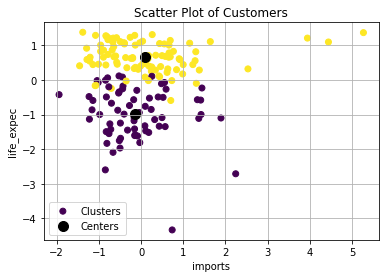

In [50]:
import matplotlib.pyplot as plt

x1_index = 3
x2_index = 6


scatter = plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis', label='Clusters')


centers = plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100, label='Centers')

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')

# Generate legend
plt.legend()

plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means


In [11]:
WCSSs = []
ks = range(1,15)
for k in ks:
    kmeans = KMeans(n_clusters=k, n_init=30, init='random')
    kmeans.fit(X_scaled)
    WCSSs.append(kmeans.inertia_)


In [12]:
WCSSs

[1503.0,
 1050.2145582853304,
 831.4244352086873,
 700.3229986404375,
 632.3942572883416,
 571.9885938590728,
 520.4628610915127,
 477.582614236158,
 433.71498911622643,
 399.24997579279056,
 367.56268841904375,
 352.3711314647178,
 339.2779840775814,
 315.37267486143253]

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

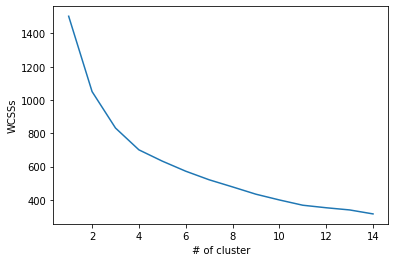

In [13]:
plt.plot(ks, WCSSs)
plt.xlabel('# of cluster')
plt.ylabel('WCSSs')
plt.show()

# 6.) Do the same for a silhoutte plot

In [14]:
from sklearn.metrics import silhouette_score

In [15]:
SCs = []
ks = range(2,15)
for k in ks:
    kmeans = KMeans(n_clusters=k, n_init=30, init='random')
    kmeans.fit(X_scaled)
    SCs.append(silhouette_score(X_scaled, kmeans.labels_))

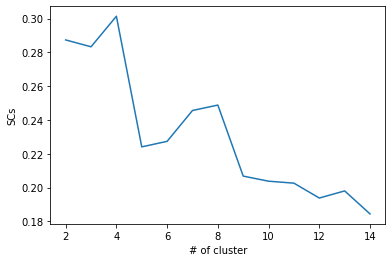

In [16]:
plt.plot(ks, SCs)
plt.xlabel('# of cluster')
plt.ylabel('SCs')
plt.show()

# 7.) Create a list of the countries that are in each cluster. Write interesting things you notice.

In [17]:
kmeans = KMeans(n_clusters=2, n_init=30, init = 'random').fit(X_scaled)

In [18]:
preds = pd.DataFrame(kmeans.predict(X_scaled))

In [19]:
output = pd.concat([preds,df], axis = 1)

In [20]:
output
print('Clsuter 1: \n',output.loc[output[0] == 0, 'country'])

Clsuter 1: 
 0      Afghanistan
3           Angola
12      Bangladesh
17           Benin
19         Bolivia
          ...     
155         Uganda
161     Uzbekistan
162        Vanuatu
165          Yemen
166         Zambia
Name: country, Length: 68, dtype: object


In [21]:
print('Clsuter 2: \n', output.loc[output[0] == 1, 'country'])

Clsuter 2: 
 1                  Albania
2                  Algeria
4      Antigua and Barbuda
5                Argentina
6                  Armenia
              ...         
158         United Kingdom
159          United States
160                Uruguay
163              Venezuela
164                Vietnam
Name: country, Length: 99, dtype: object


#### Write an observation
- cluster 1 includes some least developing and many developing countries while cluster 2 has more developed countries.

# 8.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [41]:
output.drop(columns=['country']).groupby(0).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,76.280882,30.198515,6.090147,43.642146,4227.397059,11.098750,61.910294,4.413824,1981.235294
1,12.161616,48.603030,7.314040,49.121212,26017.171717,5.503545,76.493939,1.941111,20507.979798


In [42]:
output.drop(columns=['country']).groupby(0).std()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,
0,38.076068,18.201742,2.645319,19.323451,4890.581414,13.682630,6.897418,1.285590,2528.509189
1,8.523122,30.116032,2.716652,26.928785,20441.749847,6.957187,3.735757,0.486744,20578.727127


# 9.) Write an observation about the descriptive statistics.

Group 0 tends to have higher child mortality, lower income, gdp per person and life expectency compare to group 1, this is consistent with the features of developing countries. In addition, group 0 has lower standard deviation in income and gdpp, showing that those countries has relatively similar output level, while group 1 countries are developed into different levels and has larger deviation.